In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MullaRohan/dataset_for_machine_learning/refs/heads/main/Social_Network_Ads.csv')

df = df.drop(columns=['User ID'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df.columns = ['gender', 'age', 'salary', 'purchased']
df.head()

,gender,age,salary,purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
X = df.drop(columns=['purchased'])
y = df['purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X, Y Splitted")

X, Y Splitted


In [ ]:
preprocessing = ColumnTransformer(
    transformers=[
        ('gender', OneHotEncoder(handle_unknown='ignore'), ['gender']),
        ('num', StandardScaler(), ['age', 'salary'])  # example numeric cols
    ],
    remainder='drop'
)


In [ ]:
model = Pipeline(
    steps=[
        ('preprocess', preprocessing),
        ('classifier', LogisticRegression(max_iter=1500, class_weight='balanced')),
    ]
)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('gender',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'salary'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1500))])

In [ ]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8875


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.83      0.86      0.84        28

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



<Axes: xlabel='purchased', ylabel='count'>

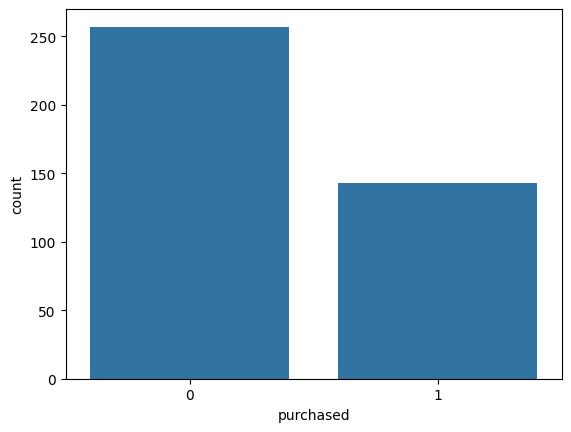

In [ ]:
import seaborn as sns
sns.countplot(data = df, x='purchased')

In [ ]:
model_svc = Pipeline(
    steps=[
        ('preprocess', preprocessing),
        ('classifier', SVC(kernel='rbf', gamma='scale', C=1.0)),
    ]
)

In [ ]:
model_svc.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('gender',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'salary'])])),
                ('classifier', SVC())])

In [ ]:
y_pred = model_svc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [ ]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([50, 30]))

In [ ]:
import pickle
file_name = 'ads_purchased.pkl'
with open(file_name, "wb") as file:
  pickle.dump(model_svc, file)